In [82]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model, naive_bayes, neighbors, svm
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [83]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [84]:
df.shape

(5110, 12)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 379.3+ KB


In [86]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [87]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [88]:
# menangani missing values
totaldata = df.isnull().sum().sort_values(ascending=False)
presentasedata = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

datahilang = pd.concat([totaldata, presentasedata], axis=1, keys=['Total', 'Percent'])
datahilang

,Total,Percent
bmi,201,0.039335
stroke,0,0.000000
smoking_status,0,0.000000
avg_glucose_level,0,0.000000
Residence_type,0,0.000000
work_type,0,0.000000
ever_married,0,0.000000
heart_disease,0,0.000000
hypertension,0,0.000000
age,0,0.000000


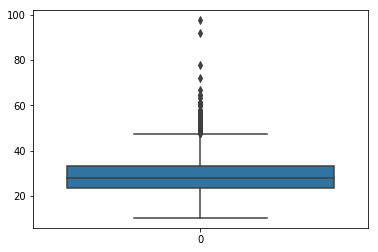

In [90]:
sns.boxplot(data=df['bmi'])

pada visualisasi gambar kita dapat simpulkan bahwa kolom bmi terdapat banyak data yang memiliki outlier

In [91]:
# mengecek nilai mean dan median
mean = (df['bmi'].mean())
median = (df['bmi'].median())

print('nilai mean {:.1f}'.format(mean))
print('nilai median {:.1f}'.format(mean))

nilai mean 28.9
nilai median 28.9


In [92]:
# mengganti data yang hilang dengan nilai median
data1=df.copy()
data1['bmi'].fillna(value=data1['bmi'].median(), inplace=True)
data1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [93]:
data1.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [94]:
age_groups = []
for i in data1['age']:
    if i <= 20:
        age_groups.append('0-20')
    if i > 20 and i <= 40:
        age_groups.append('20-40')
    if i > 40 and i <= 60:
        age_groups.append('40-60')
    if i > 60 and i <= 80:
        age_groups.append('60-80')
    if i > 80:
        age_groups.append('80+')
        
data1['ageGroup'] = age_groups

In [95]:
encoder = LabelEncoder()
data1['gender'] = encoder.fit_transform(data1['gender'])
gender = {index : label for index, label in enumerate(encoder.classes_)}
gender

{0: 'Female', 1: 'Male', 2: 'Other'}

In [96]:
data1['ageGroup'] = encoder.fit_transform(data1['ageGroup'])
ageGroup = {index : label for index, label in enumerate(encoder.classes_)}
ageGroup

{0: '0-20', 1: '20-40', 2: '40-60', 3: '60-80', 4: '80+'}

In [97]:
data1['smoking_status'] = encoder.fit_transform(data1['smoking_status'])
smoking_status = {index : label for index, label in enumerate(encoder.classes_)}
smoking_status

{0: 'Unknown', 1: 'formerly smoked', 2: 'never smoked', 3: 'smokes'}

In [98]:
data1['Residence_type'] = encoder.fit_transform(data1['Residence_type'])
Residence_type = {index : label for index, label in enumerate(encoder.classes_)}
Residence_type

{0: 'Rural', 1: 'Urban'}

In [99]:
data1['ever_married'] = encoder.fit_transform(data1['ever_married'])
ever_married = {index : label for index, label in enumerate(encoder.classes_)}
ever_married

{0: 'No', 1: 'Yes'}

In [100]:
data1['work_type'] = encoder.fit_transform(data1['work_type'])
work_type = {index : label for index, label in enumerate(encoder.classes_)}
work_type

{0: 'Govt_job',
 1: 'Never_worked',
 2: 'Private',
 3: 'Self-employed',
 4: 'children'}

In [101]:
# Drop data yang redundan
data1 = data1.drop_duplicates()

# Reset index
data1.reset_index(drop=True, inplace=True)
data = data1
data1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ageGroup
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1,3
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1,3
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1,3
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1,2
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1,3


In [102]:
''' Detection'''
# IQR
Q1 = np.percentile(data1['bmi'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data1['bmi'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data1.shape)
 
# Upper bound
upper = np.where(data1['bmi'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data1['bmi'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data1.drop(upper[0], inplace = True)
data1.drop(lower[0], inplace = True)
 
print("New Shape: ", data1.shape)
# Reset index
data1.reset_index(drop=True, inplace=True)
data1.head()

Old Shape:  (5110, 13)
New Shape:  (4984, 13)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ageGroup
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1,3
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1,3
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1,3
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1,2
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1,3


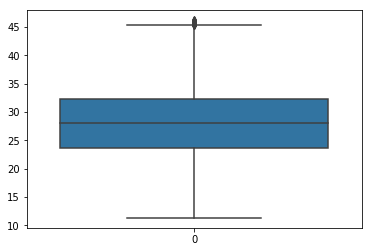

In [103]:
sns.boxplot(data=data1['bmi'])

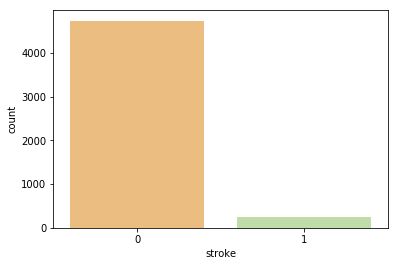

In [104]:
sns.countplot(x="stroke", data=data1, palette='Spectral')

In [105]:
data1['stroke'].value_counts()

0    4738
1     246
Name: stroke, dtype: int64

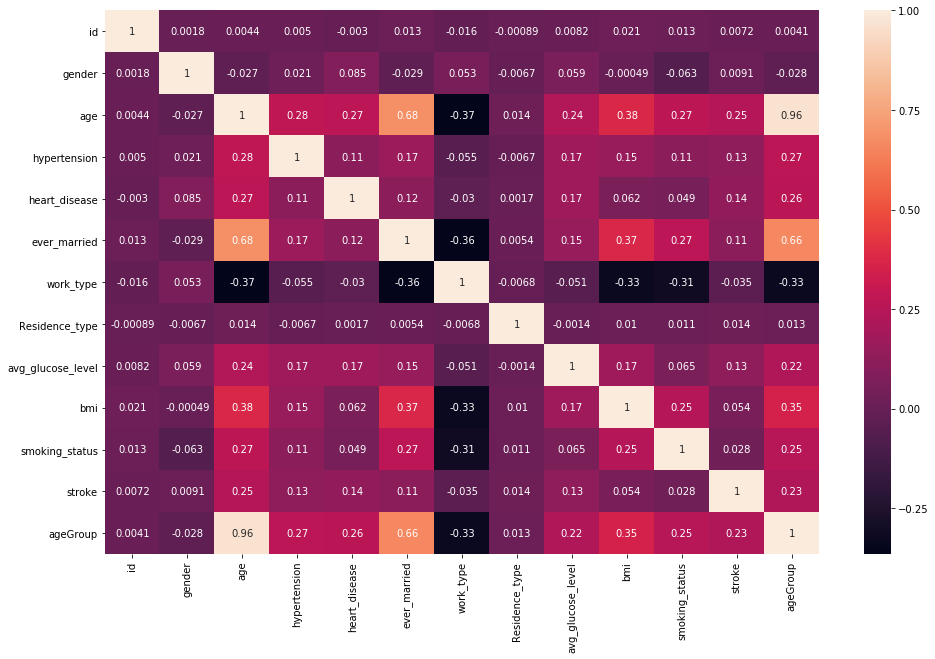

In [106]:
f, ax = plt.subplots(figsize=(16, 10))
RD = data1.corr()
sns.heatmap(RD, ax=ax, annot=True)

In [107]:
#Data Split
x = data1.drop('stroke',axis=1)
y = data1['stroke']

In [130]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(x)

#showing data
print('x \n' , X[:10])
print('y \n' , y[:10])

x 
 [[0.12321436 0.5        0.81689453 0.         1.         1.
  0.5        1.         0.80126489 0.72492837 0.33333333 0.75      ]
 [0.70820468 0.         0.74365234 0.         0.         1.
  0.75       0.         0.67902317 0.48137536 0.66666667 0.75      ]
 [0.42601512 0.5        0.97558594 0.         1.         1.
  0.5        0.         0.23451205 0.60744986 0.66666667 0.75      ]
 [0.8249283  0.         0.59716797 0.         0.         1.
  0.5        1.         0.53600776 0.66189112 1.         0.5       ]
 [0.02192856 0.         0.96337891 1.         0.         1.
  0.75       0.         0.54934909 0.36389685 0.66666667 0.75      ]
 [0.77672115 0.5        0.98779297 0.         0.         1.
  0.5        1.         0.60516111 0.50716332 0.33333333 1.        ]
 [0.73847653 0.5        0.90234375 1.         1.         1.
  0.5        0.         0.06910719 0.46131805 0.66666667 0.75      ]
 [0.14226119 0.         0.84130859 0.         0.         0.
  0.5        1.         0.1812852

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [132]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier

In [133]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=5,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(x_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(x_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(x_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(x_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(x_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

RandomForestClassifierModel Train Score is :  0.9502407704654896
RandomForestClassifierModel Test Score is :  0.9526484751203852
RandomForestClassifierModel features importances are :  [0.13308831 0.0078799  0.2632832  0.04031544 0.04241724 0.02612509
 0.02162543 0.00868437 0.17801649 0.11012561 0.02944047 0.13899844]
----------------------------------------------------
Predicted Value for RandomForestClassifierModel is :  [0 0 0 0 0 0 0 0 0 0]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.9460578  0.0539422 ]
 [0.98510513 0.01489487]
 [0.84740805 0.15259195]
 [0.79573883 0.20426117]
 [0.93596863 0.06403137]
 [0.90600986 0.09399014]
 [0.99623405 0.00376595]
 [0.99451246 0.00548754]
 [0.78844324 0.21155676]
 [0.87873751 0.12126249]]


In [134]:
from sklearn.metrics import accuracy_score

In [135]:
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  1187


In [136]:
from sklearn.metrics import f1_score
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

F1 Score is :  0.9526484751203852


Confusion Matrix is : 
 [[1187    0]
 [  59    0]]


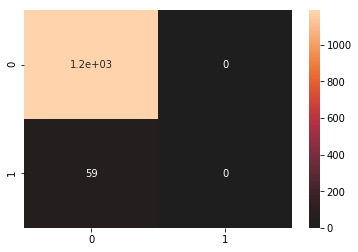

In [137]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,annot=True)
plt.show()

# Logistic Regression

In [138]:
log_reg = linear_model.LogisticRegression(max_iter = 5000)
log_reg.fit(x_train, y_train)
log_reg_acc = 100*log_reg.score(x_test, y_test)
print('Logistic Regression Predictions: \n', log_reg.predict(x_test), '\n Accuracy:', log_reg_acc, '%')

Logistic Regression Predictions: 
 [0 0 0 ... 0 0 0] 
 Accuracy: 95.26484751203851 %


# KNN Classifier

In [139]:
knn = neighbors.KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)
knn_acc = 100*knn.score(x_test, y_test)
print('K-Nearest Neighbours Predictions: \n', knn.predict(x_test), '\n Accuracy:', knn_acc, '%')

K-Nearest Neighbours Predictions: 
 [0 0 0 ... 0 0 0] 
 Accuracy: 95.26484751203851 %


# Naive Bayes Gaussian

In [140]:
nb = naive_bayes.GaussianNB()
nb.fit(x_train, y_train)
nb_acc = 100*nb.score(x_test, y_test)
print('Naive Bayes Predictions: \n', nb.predict(x_test), '\n Accuracy:', nb_acc, '%')

Naive Bayes Predictions: 
 [0 0 0 ... 0 0 0] 
 Accuracy: 88.68378812199037 %


# Ringkasan

In [141]:
pd.DataFrame(data={'Model': ['Logistic Regression', 'K-Nearest Neighbours', 'Gaussian Naive Bayes'], 'Accuracy %': [log_reg_acc, knn_acc, nb_acc]})

,Model,Accuracy %
0,Logistic Regression,95.264848
1,K-Nearest Neighbours,95.264848
2,Gaussian Naive Bayes,88.683788


# Kesimpulan

ada 4 model yang membuat prediction 96% yaitu logistic regression, K Nearest Neighbours, dan Random Forest Classifier. dan gaussian naive memprediksi hasil 86% saja